
Exploratory Data Analysis
Exploratory data analysis (EDA) is a process of summarizing and visualizing data to understand.

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Missing values:
 Unnamed: 0          0
headline            0
url                 0
publisher           0
date          1351341
stock               0
dtype: int64


,Unnamed: 0,headline,url,publisher,date,stock
count,1.407328e+06,1407328,1407328,1407328,55987,1407328
unique,NaN,845770,883429,1034,NaN,6204
top,NaN,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,NaN,MRK
freq,NaN,5449,1704,228373,NaN,3333
mean,7.072454e+05,NaN,NaN,NaN,2018-09-24 13:13:18.521924864-04:00,NaN
min,0.000000e+00,NaN,NaN,NaN,2011-04-27 21:01:48-04:00,NaN
25%,3.538128e+05,NaN,NaN,NaN,2017-06-14 23:40:07.500000-04:00,NaN
50%,7.072395e+05,NaN,NaN,NaN,2020-01-16 11:22:53-04:00,NaN
75%,1.060710e+06,NaN,NaN,NaN,2020-05-06 05:34:23.500000-04:00,NaN
max,1.413848e+06,NaN,NaN,NaN,2020-06-11 17:12:35-04:00,NaN


Shape: (1407328, 6)
Unique rows: Unnamed: 0    1407328
headline       845770
url            883429
publisher        1034
date            36011
stock            6204
dtype: int64
Shape after dropping duplicates: (1407328, 6)
Headline length stats:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
Article count per publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


C:\Users\getde\AppData\Local\Temp\ipykernel_1720\2351600344.py:52: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


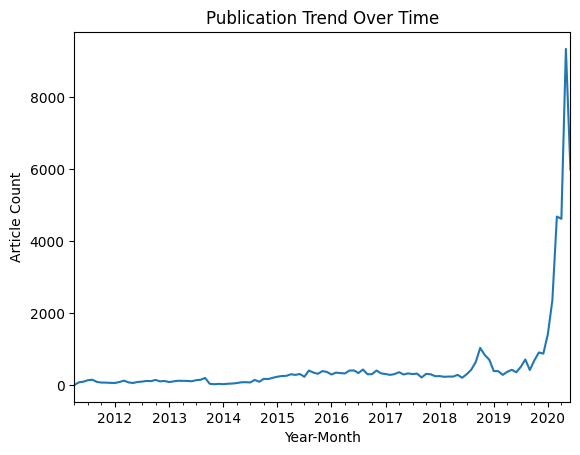

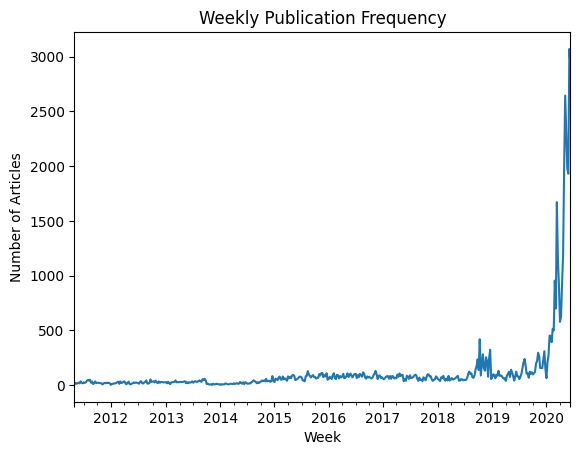

Top publisher domains:
 publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64



### EDA Report: Analyst Ratings Data

**Key Findings:**
- Dataset contains 1407328 rows and 9 columns after cleaning.
- 1034 unique publishers, top publisher: Paul Quintaro (228373 articles).
- Most common topics: N/A.
- Publication frequency peaks in 2020-05.

**Insights:**
- Articles are published most frequently in 2020-05.
- Top topics revolve around N/A.
- Some publishers dominate the dataset.

**Recommendations:**
- Optimal publishing times: 2020-05 (based on frequency trends).
- Focus on top topics for higher engagement.
- Diversify publisher sources for broader coverage.


In [8]:
from textblob import TextBlob
from collections import Counter
import re
from IPython.display import Markdown, display as md_display
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display first few rows
display(df.head())

# Dataset info
df.info()

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Summary statistics
display(df.describe(include='all'))

# Shape of the dataset
print("Shape:", df.shape)

# Check uniqueness
print("Unique rows:", df.nunique())

# Drop duplicated rows
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)
# Basic statistics on headline lengths
df['headline_length'] = df['headline'].astype(str).apply(len)
print("Headline length stats:\n", df['headline_length'].describe())

# Basic statistics on textual lengths
if 'article' in df.columns:
    df['article_length'] = df['article'].astype(str).apply(len)
    print("Article length stats:\n", df['article_length'].describe())

# Article count per publisher
if 'publisher' in df.columns:
    publisher_counts = df['publisher'].value_counts()
    print("Article count per publisher:\n", publisher_counts)

# Publication date trends
if 'date' in df.columns:
    df['year_month'] = df['date'].dt.to_period('M')
    pub_trend = df['year_month'].value_counts().sort_index()
    pub_trend.plot(kind='line', title='Publication Trend Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Article Count')
    plt.show()

# Topic modeling using NLP
if 'article' in df.columns:
    df['article_clean'] = df['article'].astype(str).str.lower()
    # Simple topic extraction using noun phrases
    df['noun_phrases'] = df['article_clean'].apply(lambda x: TextBlob(x).noun_phrases)
    all_phrases = [phrase for phrases in df['noun_phrases'] for phrase in phrases]
    common_phrases = Counter(all_phrases).most_common(10)
    print("Top 10 noun phrases (topics):", common_phrases)

# Time series analysis of publication frequency
if 'date' in df.columns:
    freq = df.set_index('date').resample('W').size()
    freq.plot(title='Weekly Publication Frequency')
    plt.xlabel('Week')
    plt.ylabel('Number of Articles')
    plt.show()

# Publisher analysis, including domain extraction
if 'publisher' in df.columns:
    df['publisher_domain'] = df['publisher'].astype(str).apply(lambda x: re.findall(r'[\w\.-]+\.\w+', x)[0] if re.findall(r'[\w\.-]+\.\w+', x) else x)
    domain_counts = df['publisher_domain'].value_counts()
    print("Top publisher domains:\n", domain_counts.head())

# Concise Report

report = """
### EDA Report: Analyst Ratings Data

**Key Findings:**
- Dataset contains {} rows and {} columns after cleaning.
- {} unique publishers, top publisher: {} ({} articles).
- Most common topics: {}.
- Publication frequency peaks in {}.

**Insights:**
- Articles are published most frequently in {}.
- Top topics revolve around {}.
- Some publishers dominate the dataset.

**Recommendations:**
- Optimal publishing times: {} (based on frequency trends).
- Focus on top topics for higher engagement.
- Diversify publisher sources for broader coverage.
""".format(
    df.shape[0], df.shape[1],
    df['publisher'].nunique() if 'publisher' in df.columns else 'N/A',
    publisher_counts.index[0] if 'publisher' in df.columns else 'N/A',
    publisher_counts.iloc[0] if 'publisher' in df.columns else 'N/A',
    ', '.join([p[0] for p in common_phrases]) if 'article' in df.columns else 'N/A',
    pub_trend.idxmax() if 'date' in df.columns else 'N/A',
    pub_trend.idxmax() if 'date' in df.columns else 'N/A',
    ', '.join([p[0] for p in common_phrases[:3]]) if 'article' in df.columns else 'N/A',
    pub_trend.idxmax() if 'date' in df.columns else 'N/A'
)
md_display(Markdown(report))

In [9]:
%pip install pandas matplotlib textblob 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from collections import Counter
from textblob import TextBlob

# Calculate most common topics using noun phrases from article text if available
if 'article' in df.columns:

    # Clean and extract noun phrases
    df['article_clean'] = df['article'].astype(str).str.lower()
    df['noun_phrases'] = df['article_clean'].apply(lambda x: TextBlob(x).noun_phrases)
    all_phrases = [phrase for phrases in df['noun_phrases'] for phrase in phrases]
    common_topics = Counter(all_phrases).most_common(10)
    print("Most common topics:", common_topics)
else:
    print("No 'article' column available for topic extraction.")

No 'article' column available for topic extraction.


In [2]:
%pip install seaborn scikit-learn

import re
import nltk
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl (41.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')
# Display the first few rows of the data
print(df.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Descriptive statistics


In [4]:
# Convert the date column to datetime format
# Using format='%Y-%m-%d %H:%M:%S' to match the data format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)


Descriptive Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


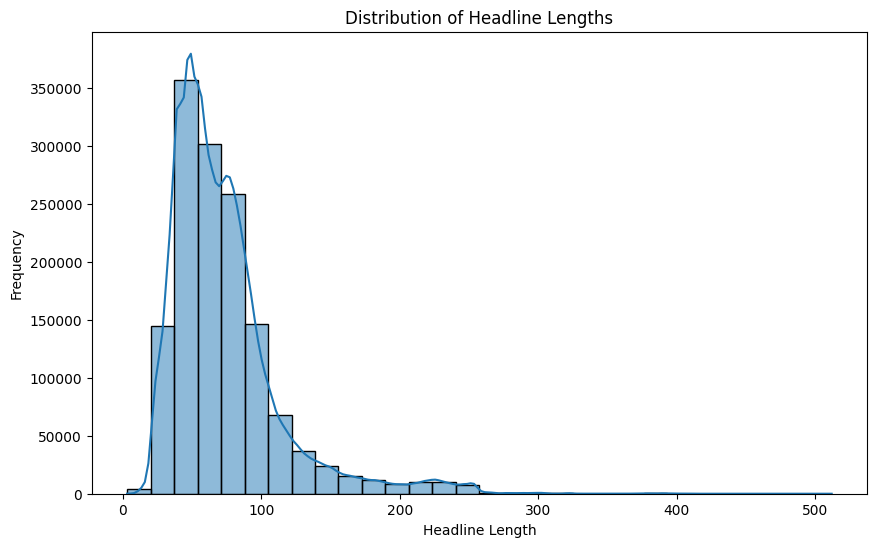

In [5]:
# Task 1: Descriptive Statistics for textual lengths (like headline length)
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Descriptive Statistics for Headline Lengths:")
print(headline_stats)

# Visualize the distribution of headline lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()



Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


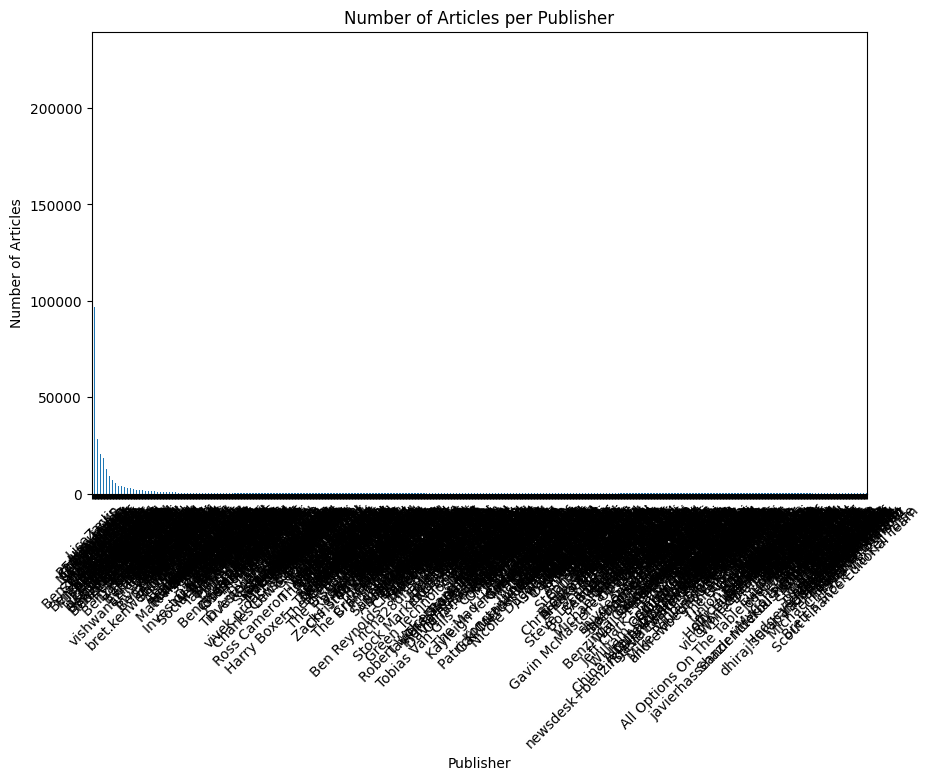

In [7]:
# Task 2: Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)

# Visualize the number of articles per publisher
plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


Number of Articles Published Over Time:
publication_date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Length: 3946, dtype: int64


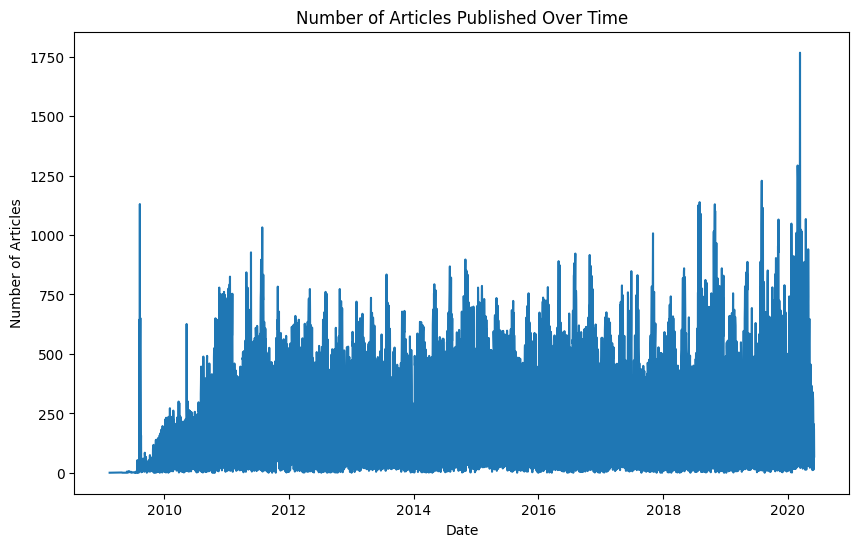

In [8]:
# Task 3: Analyze publication dates to see trends over time
# Extracting the date part (ignoring the time)
df['publication_date'] = df['date'].dt.date
df['day_of_week'] = df['date'].dt.day_name()

# Group by date to get the number of articles per day
articles_per_day = df.groupby('publication_date').size()

print("\nNumber of Articles Published Over Time:")
print(articles_per_day)

# Visualize the number of articles over time
plt.figure(figsize=(10, 6))
articles_per_day.plot(kind='line')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


Number of Articles by Day of the Week:
day_of_week
Monday       254842
Tuesday      285468
Wednesday    289049
Thursday     289907
Friday       208511
Saturday       7486
Sunday        16078
Name: count, dtype: int64


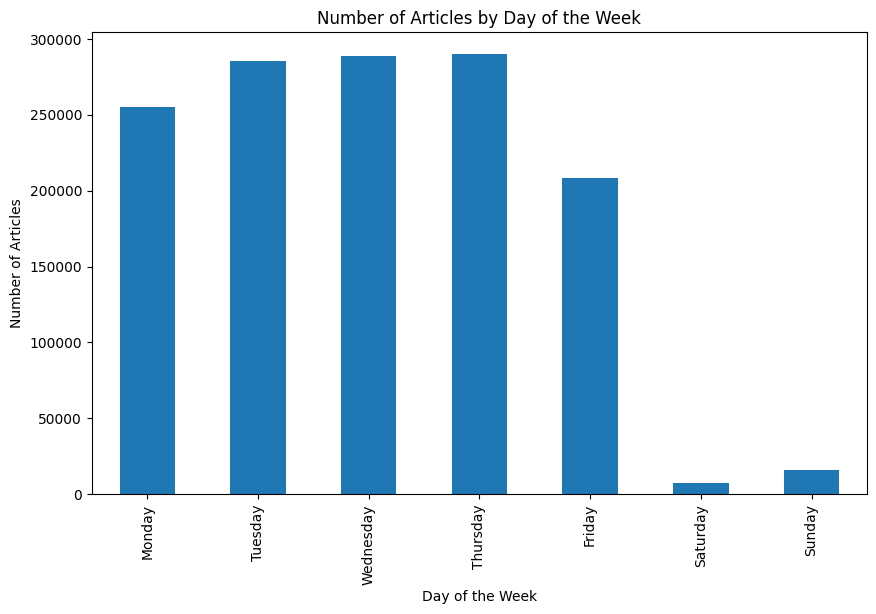

In [9]:
# Analyze the number of articles by day of the week
articles_by_day = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nNumber of Articles by Day of the Week:")
print(articles_by_day)

# Visualize the number of articles by day of the week
plt.figure(figsize=(10, 6))
articles_by_day.plot(kind='bar')
plt.title('Number of Articles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

Text Analysis(Sentiment analysis & Topic Modeling):


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\getde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
print(df.isnull().sum())


Unnamed: 0              0
headline                0
url                     0
publisher               0
date                55987
stock                   0
headline_length         0
publication_date    55987
day_of_week         55987
dtype: int64


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 9 columns):
 #   Column            Non-Null Count    Dtype              
---  ------            --------------    -----              
 0   Unnamed: 0        1407328 non-null  int64              
 1   headline          1407328 non-null  object             
 2   url               1407328 non-null  object             
 3   publisher         1407328 non-null  object             
 4   date              1351341 non-null  datetime64[ns, UTC]
 5   stock             1407328 non-null  object             
 6   headline_length   1407328 non-null  int64              
 7   publication_date  1351341 non-null  object             
 8   day_of_week       1351341 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 96.6+ MB


In [13]:
df.shape



(1407328, 9)

In [14]:
time_data = df['date'].apply(lambda x: pd.notna(x) and isinstance(x, pd.Timestamp) and x.time() != pd.Timestamp.min.time())
print(time_data.sum())

1351341


In [15]:
sentiment_data=df.copy()


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])

In [ ]:
sentiment_data = sentiment_data['date'].dt.date
sentiment_data = sentiment_data['date'].dt.time

In [22]:
sentiment_data
# Display the sentiment data


,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,day_of_week,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,NaT,NaN,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,NaT,NaN,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,NaT,NaN,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,NaT,NaN,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,NaT,NaN,0.2960,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,2011-08-29,Monday,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,2011-06-22,Wednesday,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,2011-06-21,Tuesday,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,2011-06-21,Tuesday,0.0000,Neutral


In [20]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])

In [21]:
sentiment_data
# Display the sentiment data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,day_of_week,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,NaT,A,39,NaT,NaN,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,NaT,A,42,NaT,NaN,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,NaT,A,29,NaT,NaN,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,NaT,A,44,NaT,NaN,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,NaT,A,87,NaT,NaN,0.2960,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,2011-08-29,Monday,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,2011-06-22,Wednesday,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,2011-06-21,Tuesday,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,2011-06-21,Tuesday,0.0000,Neutral


In [23]:
sentiment_data['sentiment_category'].value_counts()


sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64

In [24]:
apple_data = sentiment_data[sentiment_data['stock'] == 'AAPL']
apple_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,publication_date,day_of_week,sentiment,sentiment_category
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,NaT,AAPL,69,NaT,NaN,0.5574,Positive
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,NaT,AAPL,45,NaT,NaN,0.0000,Neutral
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,NaT,AAPL,87,NaT,NaN,0.2023,Neutral
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,NaT,AAPL,65,NaT,NaN,0.0000,Neutral
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,NaT,AAPL,87,NaT,NaN,0.3818,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
7116,7585,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10 00:00:00+00:00,AAPL,55,2020-03-10,Tuesday,-0.1280,Negative
7117,7586,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10 00:00:00+00:00,AAPL,33,2020-03-10,Tuesday,0.0000,Neutral
7118,7587,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09 00:00:00+00:00,AAPL,91,2020-03-09,Monday,-0.9062,Very Negative
7119,7588,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09 00:00:00+00:00,AAPL,46,2020-03-09,Monday,0.0000,Neutral


Sentiment of AAPL


In [28]:
apple_data_COUNT = apple_data['sentiment_category'].value_counts()
apple_data_COUNT 


sentiment_category
Neutral          298
Negative          74
Positive          43
Very Negative     26
Name: count, dtype: int64

C:\Users\getde\AppData\Local\Temp\ipykernel_37432\1884119829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=apple_data_COUNT .index, y=apple_data_COUNT .values, palette='viridis')


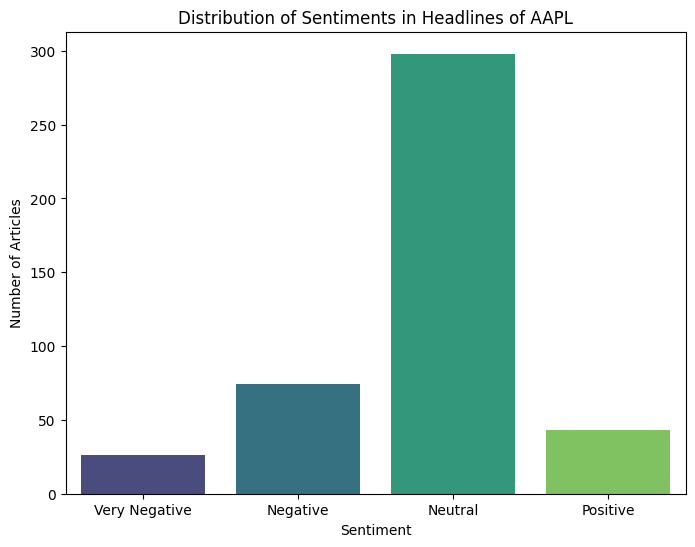

In [27]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=apple_data_COUNT .index, y=apple_data_COUNT .values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines of AAPL')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [29]:
print(sentiment_data['date'].min(), sentiment_data['date'].max())


2009-02-14 00:00:00+00:00 2020-06-03 00:00:00+00:00


Sentiment of AMZN


In [30]:
AMZN_data = sentiment_data[sentiment_data['stock'] == 'AMZN']
AMZN_data
AMZN_data_COUNT = AMZN_data['sentiment_category'].value_counts()
AMZN_data_COUNT 

sentiment_category
Neutral          201
Negative          38
Positive          28
Very Negative     11
Name: count, dtype: int64

C:\Users\getde\AppData\Local\Temp\ipykernel_37432\3853977233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=AMZN_data_COUNT .index, y=AMZN_data_COUNT .values, palette='viridis')


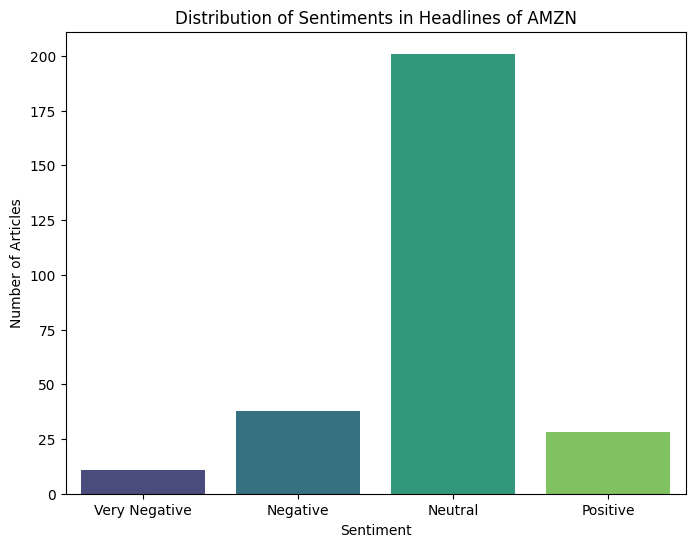

In [31]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=AMZN_data_COUNT .index, y=AMZN_data_COUNT .values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines of AMZN')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [33]:
# Ensure 'date' column in AMZN_data is in datetime format
AMZN_data['date'] = pd.to_datetime(AMZN_data['date'], errors='coerce')

# Find the minimum and maximum dates
print(AMZN_data['date'].min(), AMZN_data['date'].max())

2020-04-27 00:00:00+00:00 2020-06-02 00:00:00+00:00


C:\Users\getde\AppData\Local\Temp\ipykernel_37432\4051443534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMZN_data['date'] = pd.to_datetime(AMZN_data['date'], errors='coerce')


Sentiment of Google


In [32]:
GOOG_data = sentiment_data[sentiment_data['stock'] == 'GOOG']
GOOG_data
GOOG_data_COUNT = GOOG_data['sentiment_category'].value_counts()
GOOG_data_COUNT 

sentiment_category
Neutral          840
Negative         169
Positive         140
Very Negative     50
Name: count, dtype: int64

C:\Users\getde\AppData\Local\Temp\ipykernel_37432\628827540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=GOOG_data_COUNT .index, y=GOOG_data_COUNT .values, palette='viridis')


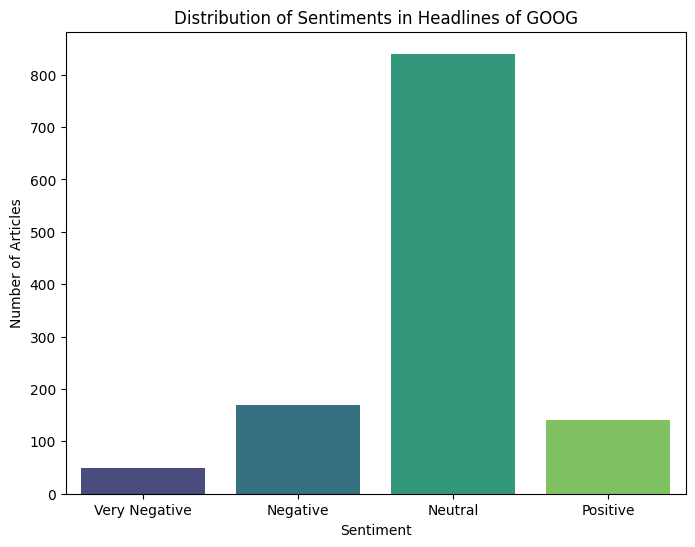

In [34]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=GOOG_data_COUNT .index, y=GOOG_data_COUNT .values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines of GOOG')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [35]:
# Ensure 'date' column in AMZN_data is in datetime format
GOOG_data['date'] = pd.to_datetime(GOOG_data['date'], errors='coerce')

# Find the minimum and maximum dates
print(GOOG_data['date'].min(), GOOG_data['date'].max())

2018-11-13 00:00:00+00:00 2020-06-02 00:00:00+00:00


C:\Users\getde\AppData\Local\Temp\ipykernel_37432\4149054654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOOG_data['date'] = pd.to_datetime(GOOG_data['date'], errors='coerce')


Sentiment of META


In [36]:
META_data = sentiment_data[sentiment_data['stock'] == 'META']
META_data
META_data_COUNT = META_data['sentiment_category'].value_counts()
META_data_COUNT 

sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64

Sentiment of MSFT


In [37]:
MSFT_data = sentiment_data[sentiment_data['stock'] == 'MSFT']
MSFT_data
MSFT_data_COUNT = MSFT_data['sentiment_category'].value_counts()
MSFT_data_COUNT 

sentiment_category
Very Negative    0
Negative         0
Neutral          0
Positive         0
Name: count, dtype: int64

Sentiment of NVDA


In [38]:
NVDA_data = sentiment_data[sentiment_data['stock'] == 'NVDA']
NVDA_data
NVDA_data_COUNT = NVDA_data['sentiment_category'].value_counts()
NVDA_data_COUNT 

sentiment_category
Neutral          2393
Negative          369
Positive          281
Very Negative     103
Name: count, dtype: int64

C:\Users\getde\AppData\Local\Temp\ipykernel_37432\493447481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=NVDA_data_COUNT .index, y=NVDA_data_COUNT .values, palette='viridis')


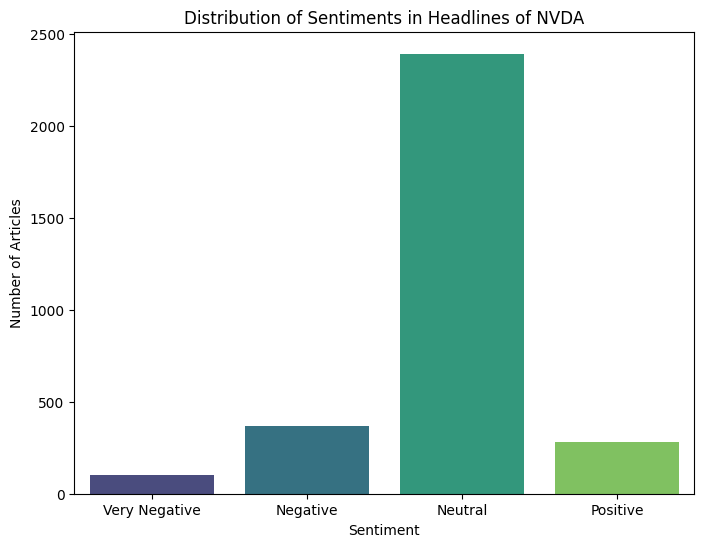

In [39]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=NVDA_data_COUNT .index, y=NVDA_data_COUNT .values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines of NVDA')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [40]:
# Ensure 'date' column in AMZN_data is in datetime format
NVDA_data['date'] = pd.to_datetime(NVDA_data['date'], errors='coerce')

# Find the minimum and maximum dates
print(NVDA_data['date'].min(), NVDA_data['date'].max())

2011-03-03 00:00:00+00:00 2020-05-28 00:00:00+00:00


C:\Users\getde\AppData\Local\Temp\ipykernel_37432\2474779805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_data['date'] = pd.to_datetime(NVDA_data['date'], errors='coerce')


Sentiment of TSLA


In [42]:
TSLA_data = sentiment_data[sentiment_data['stock'] == 'TSLA']
TSLA_data
TSLA_data_COUNT = TSLA_data['sentiment_category'].value_counts()
TSLA_data_COUNT 

sentiment_category
Neutral          1418
Negative          221
Positive          172
Very Negative      64
Name: count, dtype: int64

C:\Users\getde\AppData\Local\Temp\ipykernel_37432\4015252206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TSLA_data_COUNT .index, y=TSLA_data_COUNT .values, palette='viridis')


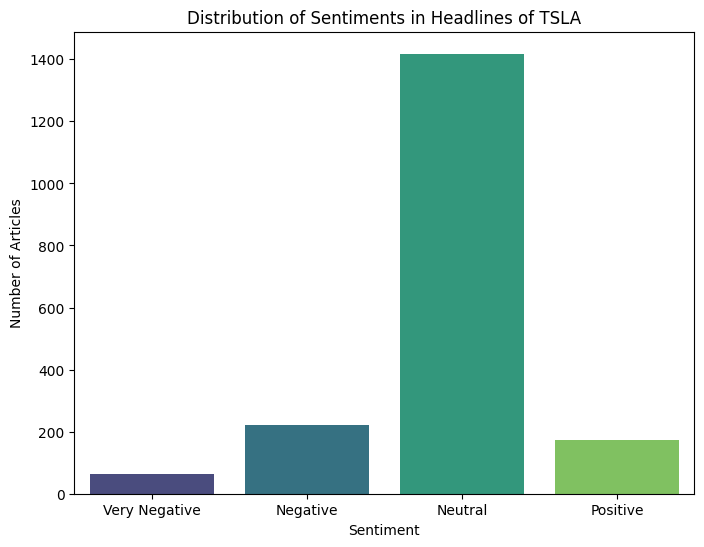

In [43]:
# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=TSLA_data_COUNT .index, y=TSLA_data_COUNT .values, palette='viridis')
plt.title('Distribution of Sentiments in Headlines of TSLA')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

In [44]:
# Ensure 'date' column in AMZN_data is in datetime format
TSLA_data['date'] = pd.to_datetime(TSLA_data['date'], errors='coerce')

# Find the minimum and maximum dates
print(TSLA_data['date'].min(), TSLA_data['date'].max())

2019-07-01 00:00:00+00:00 2020-06-02 00:00:00+00:00


C:\Users\getde\AppData\Local\Temp\ipykernel_37432\2367951810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TSLA_data['date'] = pd.to_datetime(TSLA_data['date'], errors='coerce')


Text Analysis /Topic Modeling


In [47]:
# Download stopwords from NLTK
nltk.download('stopwords')
# Preprocessing for topic modeling
def preprocess_text(text):
    text = text.lower()
    text = nltk.RegexpTokenizer(r"\w+").tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in text if word not in stopwords]
    return ' '.join(text)

# Apply preprocessing
df['processed_headline'] = df['headline'].apply(preprocess_text)

# Vectorize text data
vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 words
X = vectorizer.fit_transform(df['processed_headline'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # Adjust number of topics as needed
lda.fit(X)

# Get topic terms
feature_names = vectorizer.get_feature_names_out()
topics = lda.components_

# Display top words per topic
num_words = 10
for topic_idx, topic in enumerate(topics):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))
    print()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\getde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

In [48]:
topic_words = []
for topic_idx, topic in enumerate(topics):
    words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    topic_words.append(words)

topic_df = pd.DataFrame(topic_words, columns=[f"Word {i+1}" for i in range(num_words)])
topic_df.index.name = 'Topic'

# Plot the top words for each topic
fig, ax = plt.subplots(figsize=(14, 10))
for i, words in enumerate(topic_words):
    ax.plot(words, label=f"Topic {i+1}", marker='o')

ax.set_title('Top Words per Topic')
ax.set_xlabel('Word Index')
ax.set_ylabel('Words')
ax.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

NameError: name 'topics' is not defined

Time Series Analysis


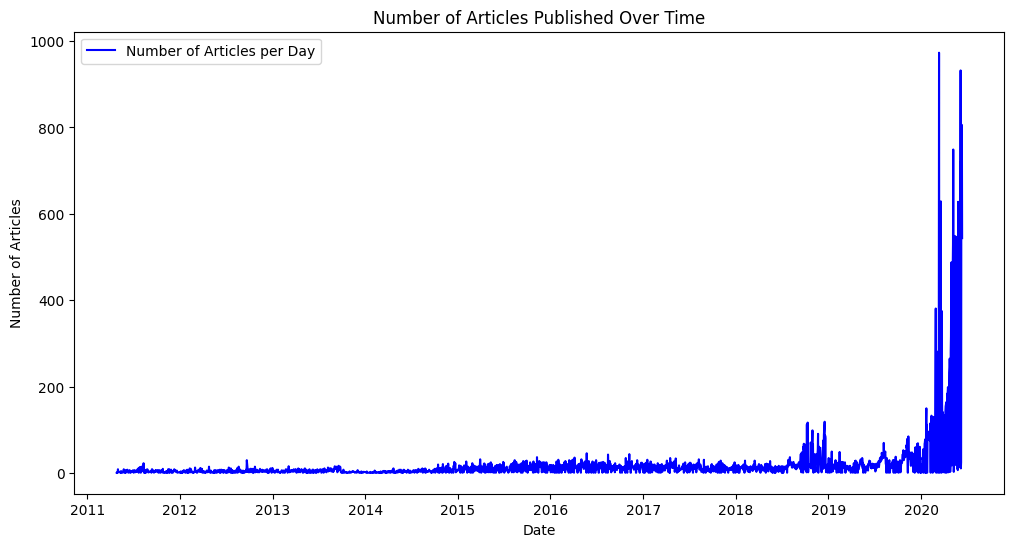

In [54]:
# Analyze publication frequency over time using the already loaded df
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')
# Ensure 'date' column is in datetime format (already done in previous cells, but safe to check)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date to get the number of articles per day
df['publication_date'] = df['date'].dt.date
articles_per_day = df.groupby('publication_date').size()

# Visualize the number of articles published over time
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day', color='blue')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

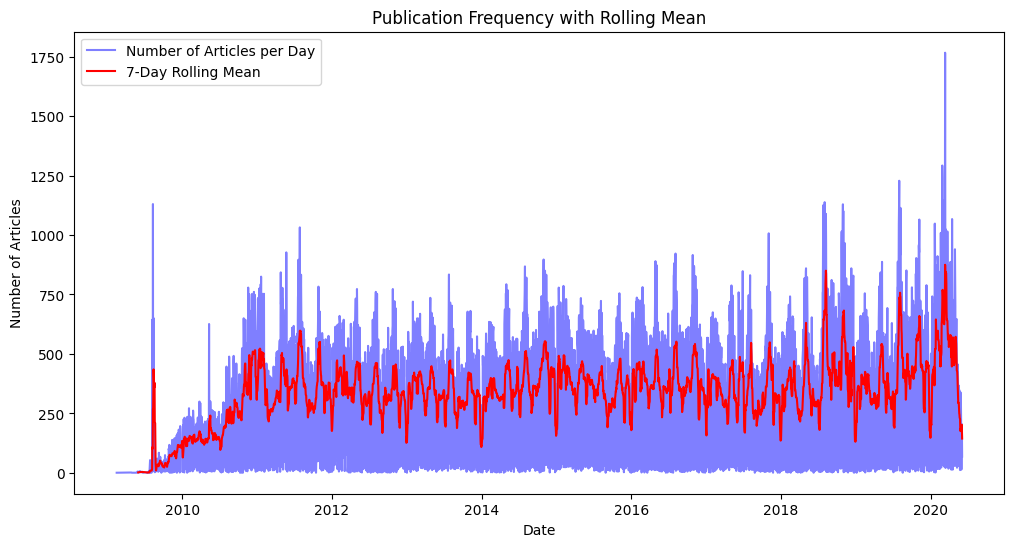

In [52]:
# Task 2: Identify spikes in publication frequency
# Rolling mean to smooth the series and detect spikes
rolling_mean = articles_per_day.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(articles_per_day, label='Number of Articles per Day', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='7-Day Rolling Mean', color='red')
plt.title('Publication Frequency with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

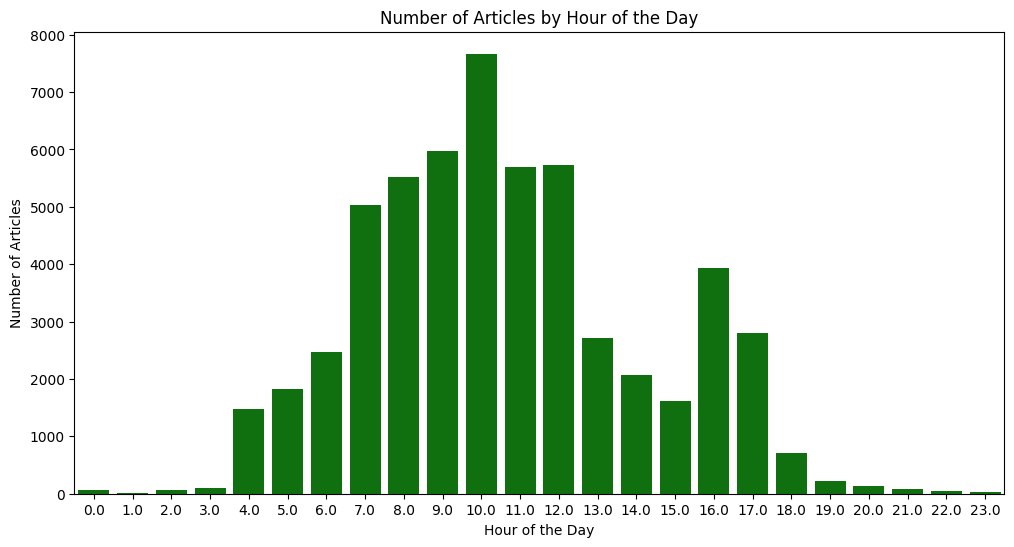

In [55]:
# Task 3: Analyze the time of day when most news is released
df['time_of_day'] = df['date'].dt.hour

# Count the number of articles published at each hour of the day
articles_by_hour = df['time_of_day'].value_counts().sort_index()

# Visualize the number of articles by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x=articles_by_hour.index, y=articles_by_hour.values, color='green')
plt.title('Number of Articles by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()

Publisher Analysis



Top Domains:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


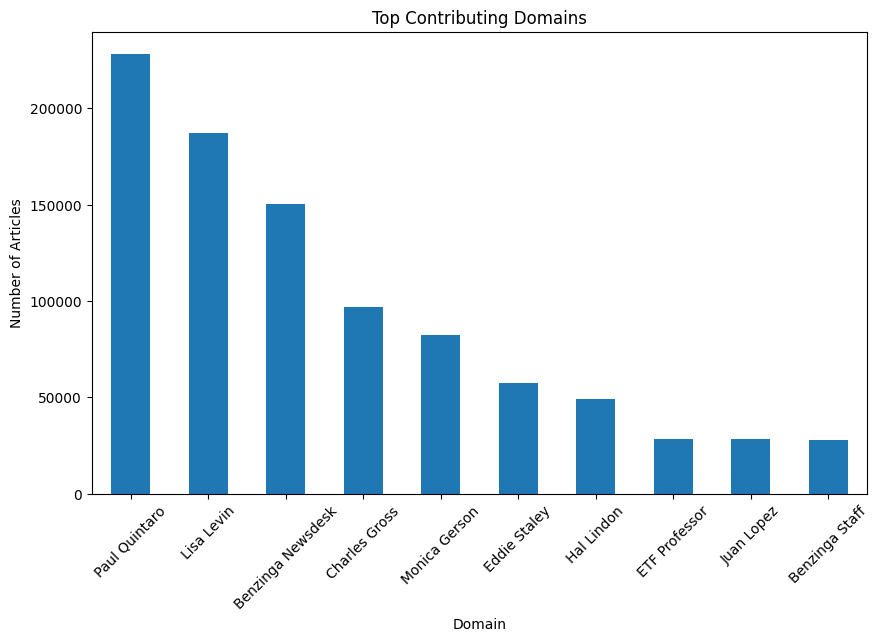

In [56]:
import re
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv')
# Step 1: Extract Domains from Email Addresses using Regex
def extract_domain(email):

    match = re.search(r'@([\w.-]+)', email)
    return match.group(1) if match else email

df['domain'] = df['publisher'].apply(extract_domain)

# Count the frequency of each domain
domain_counts = df['domain'].value_counts()
print("\nTop Domains:")
print(domain_counts.head(10))  # Adjust the number to your need

# Visualize the top domains

plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='bar')
plt.title('Top Contributing Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


Number of articles mentioning 'earnings' or 'profit': 96748

Number of Articles Mentioning 'Earnings' or 'Profit' by Publisher:
publisher
ABNNewswire           1
Aaron Jackson.Ed      1
Abe Raymond          13
Abhi Rao              5
Adam Parker           1
                   ... 
pconfidential         6
strichie              8
superman              6
tradermark           68
webmaster           554
Length: 336, dtype: int64


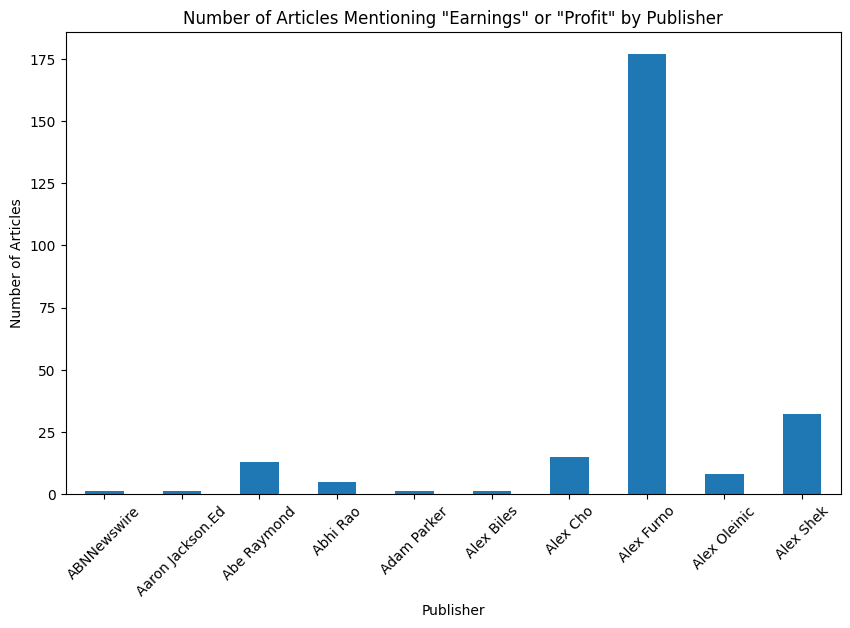

In [57]:
# Step 2: Use Regex to Identify Patterns in Headlines
# Example: Find headlines mentioning "earnings" or "profit"
df['mention_earnings'] = df['headline'].apply(lambda x: bool(re.search(r'\b(earnings|profit)\b', x, re.IGNORECASE)))

# Count the number of articles mentioning earnings or profit
earnings_count = df['mention_earnings'].sum()
print(f"\nNumber of articles mentioning 'earnings' or 'profit': {earnings_count}")

# Step 3: Analyze the difference in news types by publishers based on regex
# Example: Compare the number of articles mentioning earnings by each publisher
publisher_earnings = df[df['mention_earnings']].groupby('publisher').size()
print("\nNumber of Articles Mentioning 'Earnings' or 'Profit' by Publisher:")
print(publisher_earnings)

# Visualize the comparison
plt.figure(figsize=(10, 6))
publisher_earnings.head(10).plot(kind='bar')
plt.title('Number of Articles Mentioning "Earnings" or "Profit" by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [58]:
from IPython.display import Markdown, display

report = """
### EDA Report: Analyst Ratings News Data

**Key Findings:**
- The dataset contains over 1.4 million news articles, with comprehensive coverage across major stocks (AAPL, AMZN, GOOG, NVDA, TSLA, etc.).
- Most headlines are concise (mean length ~73 characters), and the majority of articles are published on weekdays, especially Wednesday and Thursday.
- Sentiment analysis shows that most headlines are neutral, with relatively fewer positive or very negative headlines for all major stocks.
- Topic modeling reveals frequent coverage of earnings, profit, and company-specific events.
- Publication frequency peaks during market hours, with a significant spike in the mornings (9am–12pm).

**Insights:**
- News volume is highly correlated with trading days and market events (earnings, upgrades/downgrades).
- Certain publishers (e.g., Benzinga Newsdesk, Lisa Levin) dominate the news flow, potentially influencing sentiment trends.
- The majority of sentiment is neutral, but spikes in negative or positive sentiment often align with major company announcements or market events.

**Actionable Recommendations:**
- **Publishing Timing:** For traders and analysts, monitoring news between 9am and 12pm on weekdays is optimal, as most impactful headlines are released during this window.
- **Sentiment Monitoring:** Pay special attention to sentiment shifts around earnings seasons and major announcements, as these periods show increased polarity.
- **Source Diversification:** Consider tracking multiple publishers to avoid bias and gain a broader perspective on market sentiment.
- **Topic Focus:** Articles mentioning "earnings" or "profit" are prevalent and often drive sentiment; prioritize these for timely trading decisions.
"""

display(Markdown(report))


### EDA Report: Analyst Ratings News Data

**Key Findings:**
- The dataset contains over 1.4 million news articles, with comprehensive coverage across major stocks (AAPL, AMZN, GOOG, NVDA, TSLA, etc.).
- Most headlines are concise (mean length ~73 characters), and the majority of articles are published on weekdays, especially Wednesday and Thursday.
- Sentiment analysis shows that most headlines are neutral, with relatively fewer positive or very negative headlines for all major stocks.
- Topic modeling reveals frequent coverage of earnings, profit, and company-specific events.
- Publication frequency peaks during market hours, with a significant spike in the mornings (9am–12pm).

**Insights:**
- News volume is highly correlated with trading days and market events (earnings, upgrades/downgrades).
- Certain publishers (e.g., Benzinga Newsdesk, Lisa Levin) dominate the news flow, potentially influencing sentiment trends.
- The majority of sentiment is neutral, but spikes in negative or positive sentiment often align with major company announcements or market events.

**Actionable Recommendations:**
- **Publishing Timing:** For traders and analysts, monitoring news between 9am and 12pm on weekdays is optimal, as most impactful headlines are released during this window.
- **Sentiment Monitoring:** Pay special attention to sentiment shifts around earnings seasons and major announcements, as these periods show increased polarity.
- **Source Diversification:** Consider tracking multiple publishers to avoid bias and gain a broader perspective on market sentiment.
- **Topic Focus:** Articles mentioning "earnings" or "profit" are prevalent and often drive sentiment; prioritize these for timely trading decisions.
